In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Read the Data**

In [9]:
df = pd.read_csv("cost_estimate_raw_data.csv")
df.columns = [x.replace(r' ', '') for x in list(df)]
df.sample(15)


,FactoryOverhead,LabourHours,MachineHours,RawMaterials
10,157608,1992,1171,445
20,152614,1618,860,640
9,144605,1723,869,489
26,150041,2042,971,478
31,178059,2476,1480,695
15,140793,1806,902,464
2,168896,2215,1351,437
24,153031,1917,948,468
14,155252,2179,1016,580
1,174342,1617,1227,623


**Plot FactoryOverhead against  LabourHours**

<Axes: xlabel='MachineHours', ylabel='FactoryOverhead'>

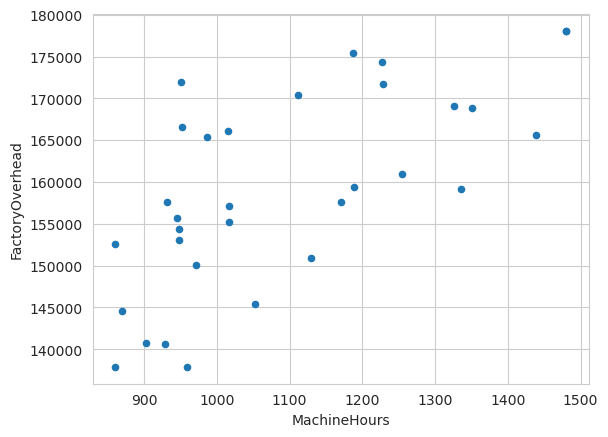

In [10]:
df.plot.scatter(y = "FactoryOverhead", x="MachineHours")

**Plot the cost with estimated regression line**

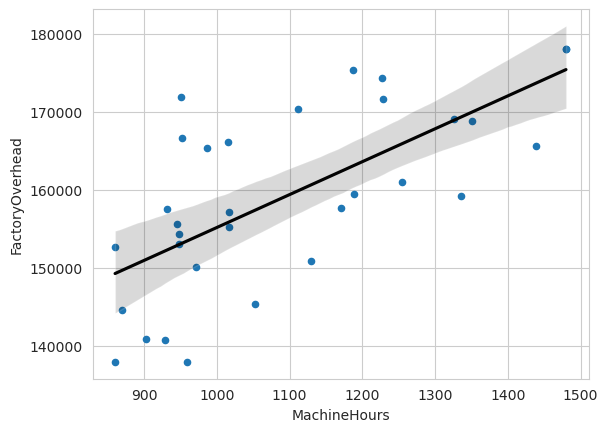

In [11]:
def graph_cost(data, i):
    df.plot.scatter(y = "FactoryOverhead", x= i)
    sns.regplot(data=data, x=i, y="FactoryOverhead", scatter=False, color=".01")
    plt.show()

graph_cost(df, "MachineHours")

**Now for all**

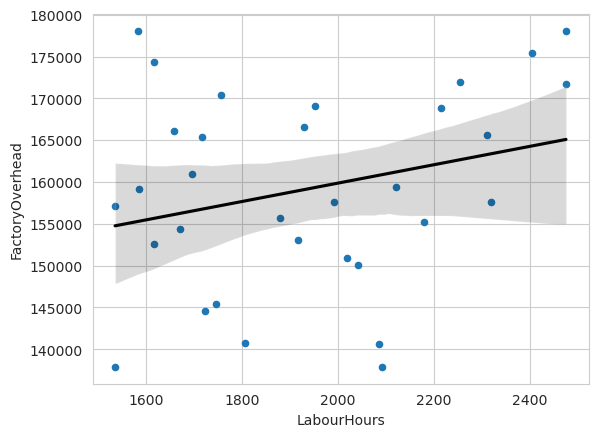

LabourHours


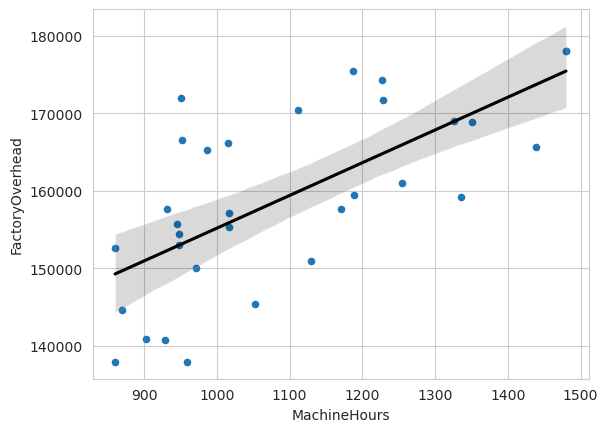

MachineHours


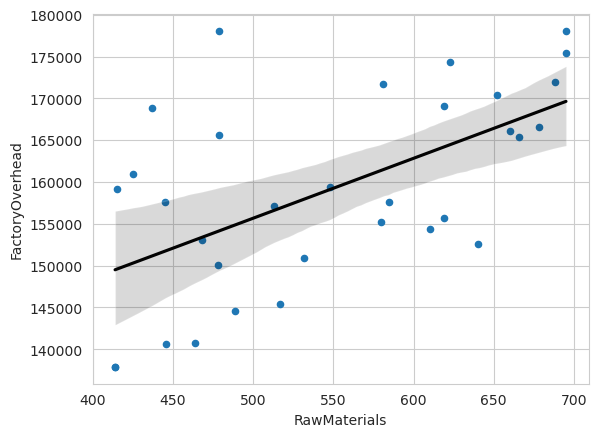

RawMaterials


In [12]:
for i in list(df)[1:]:
    graph_cost(df, i)
    print(i)

**Now run regressions to find the relevant cost parameters**

In [13]:
def regressy(data, indepvar):
    x = data[indepvar]
    y = data['FactoryOverhead']
    x = sm.add_constant(x)
    res = sm.OLS(y, x).fit()
    
    print(res.summary())
    print(f'\nFixed cost: ${res.params["const"]:4,.0f}')
    print(f'Variable cost: ${res.params[indepvar]:4,.2f}, per unit of {indepvar}.\n')
    return res

res = regressy(df, 'MachineHours')


                            OLS Regression Results                            
Dep. Variable:        FactoryOverhead   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     25.20
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.20e-05
Time:                        21:05:52   Log-Likelihood:                -335.16
No. Observations:                  32   AIC:                             674.3
Df Residuals:                      30   BIC:                             677.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.129e+05   9340.965     12.088   

In [14]:
for i in list(df)[1:]:
    regressy(df, i)

                            OLS Regression Results                            
Dep. Variable:        FactoryOverhead   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.345
Date:                Tue, 11 Nov 2025   Prob (F-statistic):              0.136
Time:                        21:05:52   Log-Likelihood:                -343.71
No. Observations:                  32   AIC:                             691.4
Df Residuals:                      30   BIC:                             694.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.379e+05    1.4e+04      9.826      

**Lastly: multivariate regression**

In [15]:
def multiple_regress(data):
    x = data[['LabourHours', 'MachineHours', 'RawMaterials']]
    y = data['FactoryOverhead']
    x = sm.add_constant(x)
    res = sm.OLS(y, x).fit()
    
    print(res.summary())
    print(f'\nFixed cost: ${res.params["const"]:4,.0f}')
    for var in x.columns:
        if var != 'const':
            print(f'Variable cost per unit of {var}: ${res.params[var]:4,.2f}')
    print()
    return res

res = multiple_regress(df)

                            OLS Regression Results                            
Dep. Variable:        FactoryOverhead   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     47.17
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           4.48e-11
Time:                        21:05:52   Log-Likelihood:                -316.10
No. Observations:                  32   AIC:                             640.2
Df Residuals:                      28   BIC:                             646.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          7.15e+04   8484.446      8.427   